# Sage (SageMath)
umožňuje výpočty v mnoha matematických oborech
- algebra
- diferenciální a integrální počet
- kombinatorika
- numerická matematika
- ...


Integrace funkcí
- NumPy, SciPy, SymPy, GAP, Singular, Maxima, R ...

Interaktivní prostředí
- příkazová řádka
- skripty (vhodné pro neinteraktivní výpočty)
- Sage Worksheet
- Jupyter Notebook

Symbolické výpočty
- pomocí SymPy

Číselné a numerické výpočty
- lineární algebra, numerické řešení rovnic, Fourierova transformace, statistika ...

Grafické možnosti
- nástroje pro tvorbu grafů a vizualizaci dat pomocí Matplotlib

#### Instalace a integrace do VS Code (v prostředí MS Windows)
1. pomocí webu https://www.sagemath.org/ stáhnout instalační soubor a provést instalaci, Pokud nebudeme používat Sage z prostředí VS Code, máme hotovo.
2. vyhledat složku C:\Users\<User>\AppData\Local\SageMath-9.3\runtime\opt\sagemath-9.3\local\share\jupyter\kernels
3. vytvořit kopii složky sagemath a nazvat ji sagemath-vscode
4. ve složce sagemath-vscode editovat soubor kernel.json, změnit:
    - "language" na "python"
    - "display name" na "SageMath 9.3 for VSCode"
5. spustit instalátorem vytvořený zástupce na "SageMath 9.3 Notebook"
6. Zkopírovat adresu serveru včetně tokenu
    - buď z konzole "SageMath 9.3 Notebook Server" spuštěné současně se serverem
    - případně lze spustit konzoli "SageMath 9.3 Shell" a zadat příkaz "jupyter notebook list"
7. V prostředí VS Code stisknout Ctrl-Shift-P a do vstupního pole začít psát "specify". Vybrat "Specify local or remote Jupyter server for connections", vložit kopírovanou položku a potvrdit klávesou Enter


## Číselné množiny

Množina celých čísel

In [ ]:
ZZ

Množina racionálních čísel

In [3]:
QQ

Rational Field

Množina reálných čísel
- libovolná přesnost

In [2]:
print(RR)
print(RealField(666))

Real Field with 53 bits of precision
Real Field with 666 bits of precision


Vlastnosti

In [ ]:
print(ZZ.is_field())        # není to těleso (1/z není ze ZZ)
print(ZZ.is_finite())       # není konečné (nemá konečný počet prvků)
print(QQ.is_field())        # je to těleso
print(QQ.is_finite())       # není konečné

In [ ]:
x = 60
print(x in ZZ)              # je celé číslo
print(60.0 in ZZ)           # Sage rozpozná celé číslo
print(60.1 in ZZ)           # není celé číslo
x = ZZ(60.0)
print(x in ZZ)

In [ ]:
print(4/3)
print(4/3 in QQ)

#### Celá čísla

metody
- stačí po tečce stisknout TAB

In [ ]:
print(x.factor())           # symbolická faktorizace
print(x.divisors())         # dělitelé
print(x.is_prime())         # je to prvočíslo?
print(x.bits())             # bitová binární reprezentace
print(x.digits())           # cifry (v desítkové soustavě)
print(x.previous_prime())   # předcházející prvočíslo

In [ ]:
print(2 + 3, 5 - 3)
print(7 * 2)
print(8 / 2, 8 / 2 in ZZ)
print(9 / 2, 9 / 2 in ZZ)
print(sqrt(4), sqrt(4) in ZZ)
print(sqrt(5), sqrt(5) in ZZ)

#### Racionální čísla

In [ ]:
print(4/3 + 1/2)
print(4/3 * 2/3)

In [ ]:
print(sqrt(4/9) in QQ)  # pokud to lze, vrátí Sage výsledek jako racionální číslo
print(sqrt(2/3) in QQ)  # není racionální

#### Reálná čísla

Číselná aproximace iracionálního čísla

In [ ]:
print(n(pi))
print(n(pi, digits=70))

Způsob vyjádření reálného čísla

In [ ]:
T = RealField(4)                  # Real Field with 4 bits of precision
U = RealField(5)                  # Real Field with 5 bits of precision
V = RealField(32)                 # Real Field with 32 bits of precision
x = T(pi)
y = T(1/3)
print("číslo:\t", pi, 1/3)
print("4b:\t", x, y)
print("5b:\t", U(pi), U(1/3))
print("32b:\t", V(pi), V(1/3))

In [ ]:
m = x.sign_mantissa_exponent()      # mantisa * 2^exponent
print(m)
print(n(m[1] * 2^(m[2])))

Operace s reálnými čísly

In [ ]:
print(pi / 3)
print(n(pi / 3, digits=100))

## Symbolické výrazy

bez zaokrouhlení

In [ ]:
print(sqrt(2))              # textový výstup
show(sqrt(2))               # grafický výstup

In [ ]:
show(sin(pi/7))
show(e^7 - 10)
show(sqrt(pi)/3)


Porovnejte:

In [ ]:
print(0.5 * sqrt(2))            # ztrácíme přesnost
print(1/2 * sqrt(2))            # přesný výraz

## Výpočty

Proměnné definujeme jako var

In [105]:
u = var('u')
show(sin(u))

sin(u)

### Řešení rovnic

In [ ]:
x = var('x')
print(solve(x^2 + 3*x + 2, x))
show(solve(x^2 + 3*x + 2, x))

S parametry

In [ ]:
x, b, c = var('x b c')
show(solve([x^2 + b*x + c == 0],x))

Soustavy

In [ ]:
x, y = var('x, y')
solve([x+y==6, x-y==4], x, y)

Např.

In [94]:
x, y, p, q = var('x y p q')
eq1 = p+q==9
eq2 = q*y+p*x==-6
eq3 = q*y^2+p*x^2==24
show(solve([eq1,eq2,eq3,p==1],p,q,x,y))                         # symbolické řešení
reseni = solve([eq1,eq2,eq3,p==1],p,q,x,y, solution_dict=True)
show(reseni)
print(reseni[0][x].n(), reseni[1][x].n())                       # vyčíslení (zde metoda)
show([[s[p].n(30), s[q].n(30), s[x].n(30), s[y].n(30)] for s in reseni])


[[p == 1, q == 8, x == -4/3*sqrt(10) - 2/3, y == 1/6*sqrt(10) - 2/3], [p == 1, q == 8, x == 4/3*sqrt(10) - 2/3, y == -1/6*sqrt(10) - 2/3]]

[{p: 1, q: 8, x: -4/3*sqrt(10) - 2/3, y: 1/6*sqrt(10) - 2/3},
 {p: 1, q: 8, x: 4/3*sqrt(10) - 2/3, y: -1/6*sqrt(10) - 2/3}]

-4.88303688022451 3.54970354689117


[[1.0000000, 8.0000000, -4.8830369, -0.13962039],
 [1.0000000, 8.0000000, 3.5497035, -1.1937129]]

#### Numerické řešení rovnic
- např. když symbolické selže

In [97]:
theta = var('theta')
solve(cos(theta)==sin(theta), theta)

[sin(theta) == cos(theta)]

Řešíme numericky, např. na intervalu $(0, \pi/2)$

In [98]:
phi = var('phi')
find_root(cos(phi)==sin(phi),0,pi/2)

0.7853981633974484

### Diferenciální a integrální počet

In [110]:
u = var('u')
show(sin(u))
show(diff(sin(u), u))

sin(u)

cos(u)

In [111]:
diff(sin(x^2), x, 4)

16*x^4*sin(x^2) - 48*x^2*cos(x^2) - 12*sin(x^2)

#### Parciální derivace

In [136]:
x, y = var('x,y')
f = x^2 + 17*y^2
print(f.diff(x))                # podle x
print(f.diff(y))                # podle y

2*x
34*y


#### Integrály

In [115]:
show(integral(x*sin(x^2), x))           # neurčitý
show(integral(x/(x^2+1), x, 0, 1))      # od 0 do 1

-1/2*cos(x^2)

1/2*log(2)

#### Řešení diferenciálních rovnic
např. $x'+x-1=0$

In [119]:
t = var('t')                # definice proměnné t
x = function('x')(t)        # definice x jako funkce t
DE = diff(x, t) + x - 1
res = desolve(DE, [x,t])
print(res)
show(res)

(_C + e^t)*e^(-t)


(_C + e^t)*e^(-t)

## Matice a vektory

Násobení intuitivní

In [140]:
A = Matrix([[1,2,3],[3,2,1],[1,1,1]])
w = vector([1,1,-4])
print(w*A)
print(A*w)

(0, 0, 0)
(-9, 1, -2)


In [147]:
A = Matrix([[1,2,3],[3,2,1],[1,1,1]])   # matice soustavy
Y = vector([0, -4, -1])                 # vektor pravých stran

X = A.solve_right(Y)                    # řešení
print(X)
print(A*X)                              # ověření

(-2, 1, 0)
(0, -4, -1)


In [150]:
print(A \ Y)                            # jiný způsob zápisu řešení

(-2, 1, 0)


Vlastní čísla a vlastní vektory

In [155]:
print(sqrt(-1))                 # imaginární jednotka
A = matrix([[0, 4], [-1, 0]])
print(A.eigenvalues())          # vlastní čísla
B = matrix([[1, 3], [3, 1]])
print(B.eigenvalues())          # vlastní čísla
print(B.eigenvectors_left())    # seznam trojic [(vlastní číslo, vlastní vektor, násobnost)]

I
[-2*I, 2*I]
[4, -2]
[(4, [
(1, 1)
], 1), (-2, [
(1, -1)
], 1)]


## 2D Grafy

(pokud se graf nezobrazí, přepnětě tlačítkem vlevo na Change presentation - image/png)

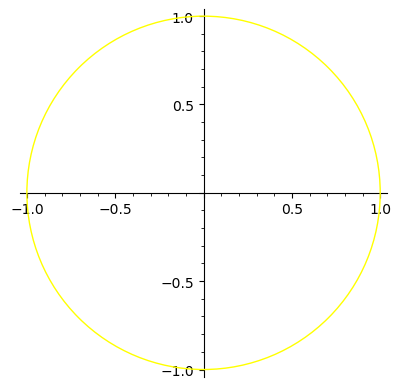

In [158]:
plot(circle((0,0), 1, rgbcolor=(1,1,0)))

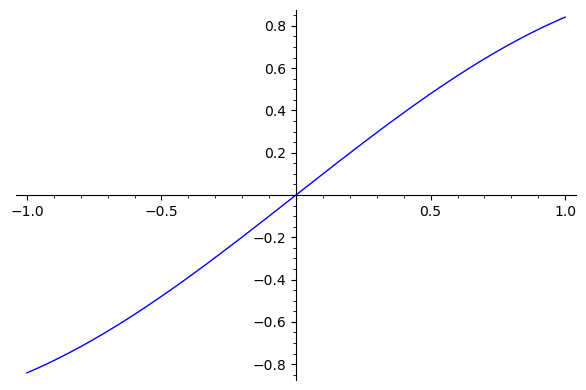

In [160]:
plot(sin(x))

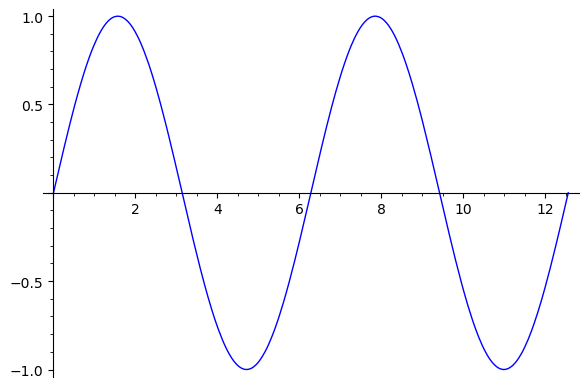

In [162]:
plot(sin(x), 0, 4*pi)

více na https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html

## 3d Grafy

křivka definovaná třemi funkcemi 1 proměnné

In [170]:
u = var('u')
parametric_plot3d((sin(u), cos(u), u/10), (u,0,20))

Graphics3d Object

zjednodušená syntaxe

In [167]:
parametric_plot3d((sin, cos, lambda u: u/10), (0,20))

Graphics3d Object

Parametrická plocha

In [172]:
u, v = var('u,v')
parametric_plot3d((cos(u), sin(u)+cos(v), sin(v)), (u,0,2*pi), (v,-pi,pi), mesh = True)

Graphics3d Object

In [176]:
parametric_plot3d((cos(u), sin(u)+cos(v), sin(v)), (u,0,2*pi), (v,-pi,pi), 
color='green', opacity=0.1, plot_points=[30,30])

Graphics3d Object

více na https://doc.sagemath.org/html/en/reference/plot3d/sage/plot/plot3d/parametric_plot3d.html

## Statistika

In [179]:
print(mean([1,2,3]))            # průměr
print(mean([pi, e]))

2
1/2*pi + 1/2*e


In [181]:
v = [1,2,4,1,6,2,6,7,1]
print(mean(v))                  # průměr
print(median(v))                # medián
print(mode(v))                  # modus

10/3
2
[1]


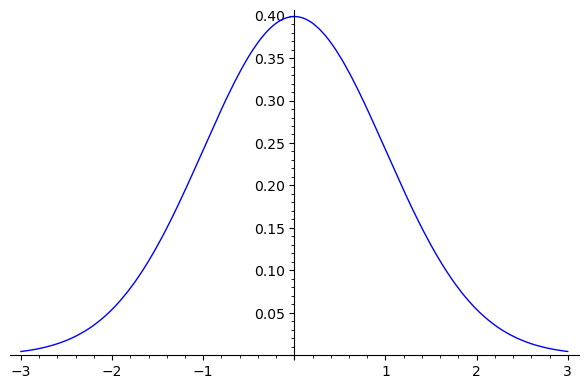

In [185]:
sigma=1
D=RealDistribution('gaussian', sigma)
p1=D.plot((x,-3,3))
p1